In [1]:
from keras.datasets import imdb

In [2]:
# keeping top 10000 most frequently occurring words in the training data
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words=10000)


17473536/17464789 [==============================] - 0s 0us/step


In [3]:
trainLabels[0]

1

In [4]:
max([max(sequence) for sequence in trainData])

9999

In [5]:
# vectorize data

import numpy as np

def vectorize(seq, dim=10000):
  result = np.zeros((len(seq), dim))
  for i, s in enumerate(seq):
    result[i, s] = 1
  return result

x_train = vectorize(trainData)
x_test = vectorize(testData)

y_train = np.asarray(trainLabels).astype('float32')
y_test = np.asarray(testLabels).astype('float32')


In [6]:
# creating the neural network

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [7]:
# compile the model

model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [8]:
# validation set

x_val  = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [9]:
# training the model

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 50ms/step - loss: 0.5401 - acc: 0.7730 - val_loss: 0.4046 - val_acc: 0.8697
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3301 - acc: 0.8969 - val_loss: 0.3250 - val_acc: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2374 - acc: 0.9237 - val_loss: 0.2948 - val_acc: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1900 - acc: 0.9379 - val_loss: 0.3048 - val_acc: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1547 - acc: 0.9519 - val_loss: 0.2841 - val_acc: 0.8876
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1261 - acc: 0.9618 - val_loss: 0.2867 - val_acc: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1059 - acc: 0.9685 - val_loss: 0.3221 - val_acc: 0.8774
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0852 - a

In [10]:
# plotting the data

import matplotlib.pyplot as plt

hist_dict = history.history
hist_dict.keys()





dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

[0.5400702953338623, 0.33007413148880005, 0.23739629983901978, 0.18995621800422668, 0.1546664834022522, 0.12612368166446686, 0.1059095486998558, 0.08518136292695999, 0.0683922991156578, 0.059529684484004974, 0.04589449614286423, 0.0365728922188282, 0.030945630744099617, 0.02426392212510109, 0.018122101202607155, 0.01454828679561615, 0.010837998241186142, 0.008860831148922443, 0.007882747799158096, 0.0036685222294181585]


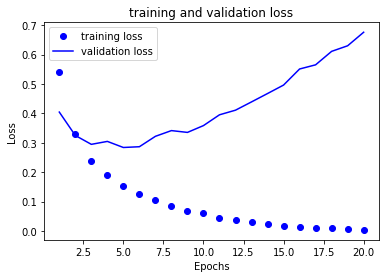

In [14]:
loss_values = hist_dict['loss']
print(loss_values)
val_loss_values = hist_dict['val_loss']

epochs = range(1, len(hist_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

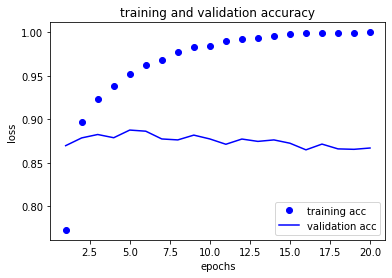

In [15]:
plt.clf()
acc_values = hist_dict['acc']
val_acc_values = hist_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='training acc')
plt.plot(epochs, val_acc_values, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()



In [17]:
# training the model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4734 - accuracy: 0.8273
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2729 - accuracy: 0.9048
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2069 - accuracy: 0.9255
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2867 - accuracy: 0.8867


[0.2867186665534973, 0.886680006980896]

In [18]:
# prediction

model.predict(x_test)

array([[0.21580642],
       [0.9996785 ],
       [0.87027377],
       ...,
       [0.1298827 ],
       [0.08799842],
       [0.53121406]], dtype=float32)